🧪 Dự đoán điểm tâm trạng (Mood Score) bằng Machine Learning

Nhóm 9:

- Nguyễn Ngọc Hải	Haui-2022605947

- Nguyễn Thành Công	Haui-2022606702 

- Vũ Minh Đức	11221425

- Nguyễn Hoàng Nguyên	11224818

- Nguyễn Trọng Vỹ	11227025

Nguồn dữ liệu: https://www.kaggle.com/datasets/abhishekdave9/digital-habits-vs-mental-health-dataset/data

# Giới thiệu bài toán 
- Dự đoán mức độ "mood" (điểm tâm trạng) của người dùng dựa trên:
  - screen_time_hours – Thời gian sử dụng thiết bị màn hình (giờ/ngày)
  - social_media_platforms_used – Số lượng nền tảng mạng xã hội sử dụng
  - hours_on_TikTok – Số giờ sử dụng TikTok mỗi ngày
  - sleep_hours – Thời gian ngủ mỗi đêm (giờ)
  - stress_level – Mức độ căng thẳng (thang điểm, ví dụ: 1–10)

- Mục tiêu: Dự đoán biến liên tục mood_score – Điểm tâm trạng → Hồi quy

- Dự liệu có 100000 dòng dữ liệu không có giá trị null và đều là biến numerical

- Kết quả mong đợi của báo cáo tìm ra model phù hợp với bài toán 1 trong 5 model: dựa vào r2_score và mse
  - Linear_Regression
  - GradientBoostingRegressor
  - RandomForestRegressor
  - neural_network
  - Polynomial_Regression

# Import thư viện

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Đọc dữ liệu

In [2]:
df = pd.read_csv('digital_habits_vs_mental_health.csv')
df.head()

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
0,10.30,2,5.30,4.40,10,5
1,6.50,5,3.50,6.20,8,8
2,9.10,4,2.80,6.60,7,8
3,6.50,3,2.50,6.50,7,9
4,2.10,3,1.20,7.80,2,10


# Khám phá dữ liệu

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   screen_time_hours            100000 non-null  float64
 1   social_media_platforms_used  100000 non-null  int64  
 2   hours_on_TikTok              100000 non-null  float64
 3   sleep_hours                  100000 non-null  float64
 4   stress_level                 100000 non-null  int64  
 5   mood_score                   100000 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 4.6 MB


,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,6.00,3.00,2.40,6.99,6.18,9.06
std,1.99,1.41,1.08,1.47,2.05,1.28
min,1.00,1.00,0.20,3.00,1.00,2.00
25%,4.70,2.00,1.60,6.00,5.00,8.00
50%,6.00,3.00,2.30,7.00,6.00,10.00
75%,7.30,4.00,3.10,8.00,8.00,10.00
max,12.00,5.00,7.20,10.00,10.00,10.00


In [19]:
df.describe()

,screen_time_hours,social_media_platforms_used,hours_on_TikTok,sleep_hours,stress_level,mood_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,6.003505,2.997820,2.401433,6.988489,6.179590,9.06076
std,1.987073,1.414452,1.079111,1.466330,2.045409,1.27847
min,1.000000,1.000000,0.200000,3.000000,1.000000,2.00000
25%,4.700000,2.000000,1.600000,6.000000,5.000000,8.00000
50%,6.000000,3.000000,2.300000,7.000000,6.000000,10.00000
75%,7.300000,4.000000,3.100000,8.000000,8.000000,10.00000
max,12.000000,5.000000,7.200000,10.000000,10.000000,10.00000


In [6]:
df.isnull().sum()

screen_time_hours              0
social_media_platforms_used    0
hours_on_TikTok                0
sleep_hours                    0
stress_level                   0
mood_score                     0
dtype: int64

# Trực quan hóa dữ liệu

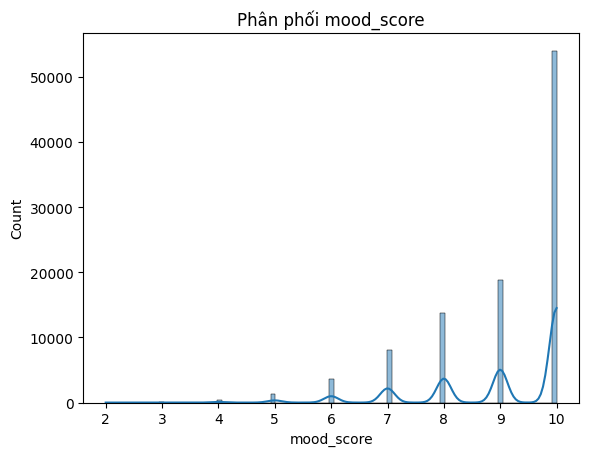

In [21]:
sns.histplot(df['mood_score'], kde=True)
plt.title('Phân phối mood_score')
plt.show()

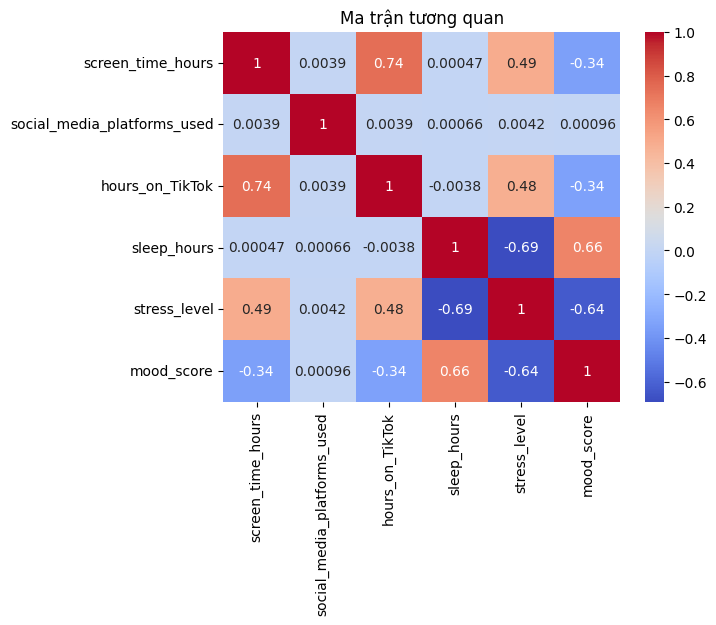

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()

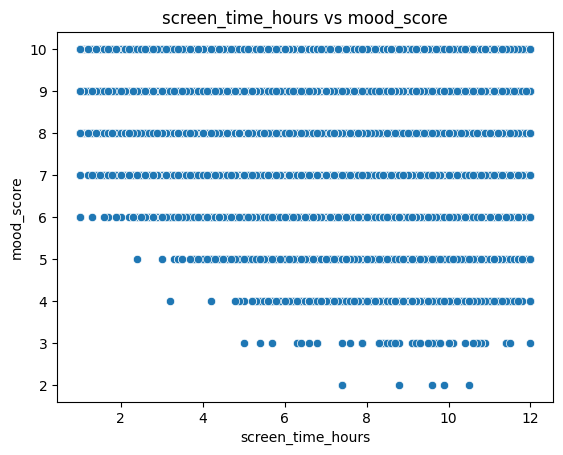

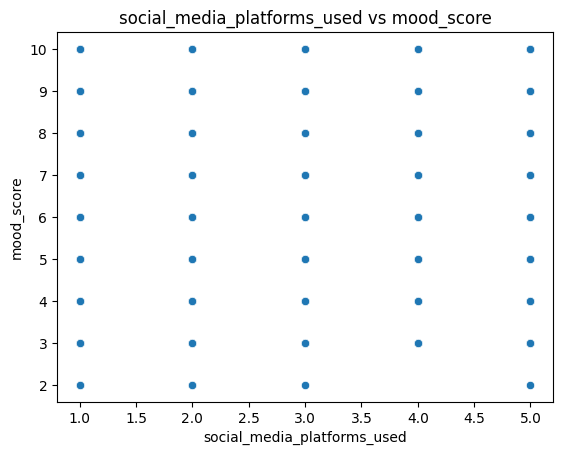

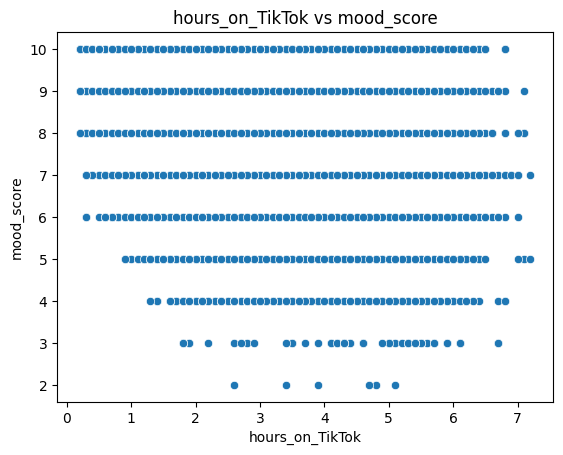

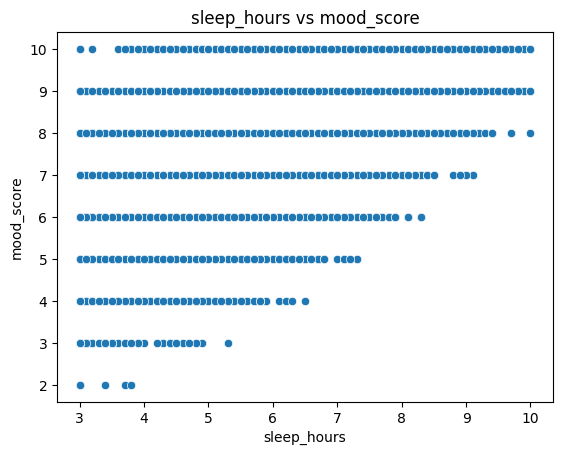

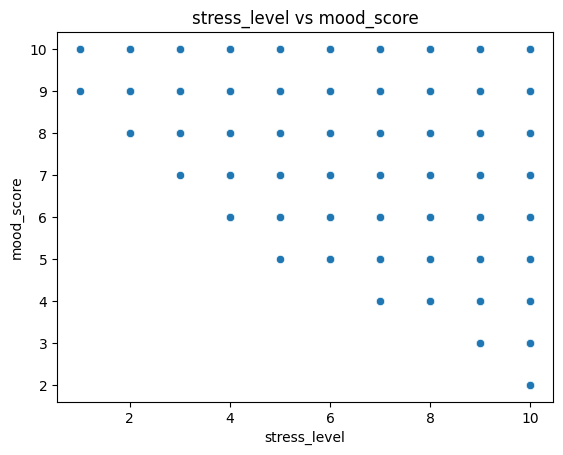

In [4]:
features = ['screen_time_hours', 'social_media_platforms_used', 'hours_on_TikTok', 'sleep_hours', 'stress_level']
for col in features:
    sns.scatterplot(data=df, x=col, y='mood_score')
    plt.title(f"{col} vs mood_score")
    plt.show()

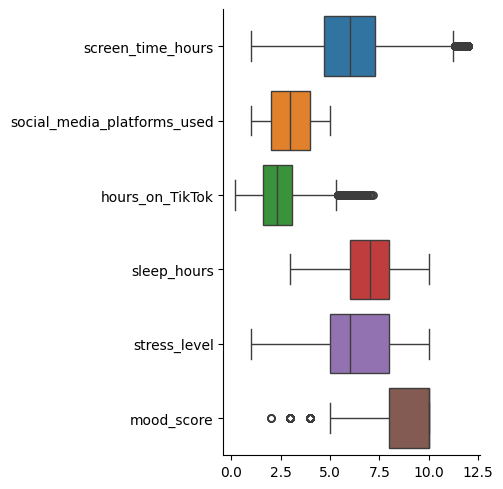

In [8]:
sns.catplot(data=df[['screen_time_hours', 'social_media_platforms_used', 'hours_on_TikTok',
                    'sleep_hours', 'stress_level', 'mood_score']], kind='box', orient='h')
plt.show()

Dựa vào các bảng trên ta có nhận xét

- Các yếu tố ngủ đủ liên quan tích cực đến sức khỏe tinh thần (ít stress, tâm trạng tốt).

- Dùng thiết bị và TikTok quá nhiều có liên quan đến tăng stress và giảm tâm trạng.

- Số lượng nền tảng mạng xã hội sử dụng không ảnh hưởng rõ ràng đến các yếu tố còn lại.

=> khi huấn luyện nếu muốn bỏ bớt tham số có thể bỏ qua feature Số lượng nền tảng mạng xã hội sử dụng 

Xuất hiện overfitting(screen, hours_on_TikTok, moodscore) nhưng với số lượng rất nhỏ chỉ tầm 1% của dữ liệu cũng không ảnh hưởng quá lớn đến huấn luyện model 

# Tiền xử lý dữ liệu

In [5]:
X = df[features]
y = df['mood_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mô hình Linear Regression(Nguyễn Thành Công)

Lí do chọn Linear Regression : 

- Dữ liệu của bài toán có vẻ mang tính liên tục và các biến đầu vào như thời gian sử dụng thiết bị, giấc ngủ, mức độ stress… đều có khả năng ảnh hưởng tuyến tính đến mood_score. 

- Mô hình này đơn giản, dễ diễn giải và phù hợp để đánh giá mối quan hệ giữa các yếu tố với mood_score.

In [6]:
# Chuẩn hóa dữ liệu (tốt cho Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Khởi tạo mô hình
model = LinearRegression()
model.fit(X_train_scaled, y_train)



LinearRegression()

In [8]:
# Dự đoán
y_pred = model.predict(X_test_scaled)
# Phần dư
residuals = y_test - y_pred

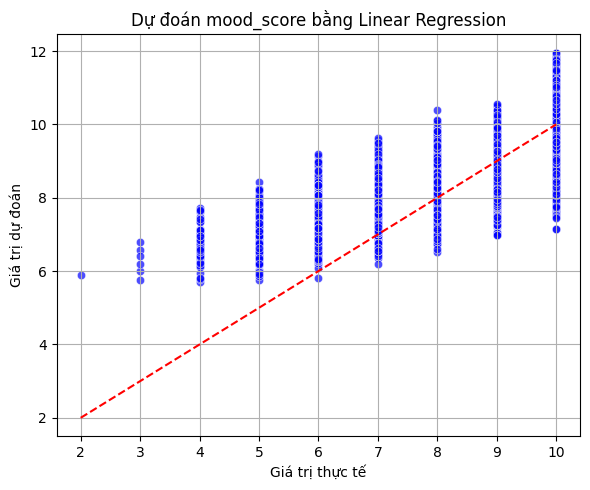

In [74]:
# Trực quan hoá kết quả dự đoán
plt.figure(figsize=(6, 5))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.title("Dự đoán mood_score bằng Linear Regression")
plt.grid(True)
plt.tight_layout()
plt.show()

Nhận xét:

Các điểm xanh (dự đoán) có xu hướng nằm trên đường chéo (dự đoán = thực tế), tuy nhiên:

- Mô hình dự đoán cao hơn thực tế với các điểm thấp (underfitting nhẹ ở mood thấp).

- Và có xu hướng dự đoán thấp hơn thực tế khi mood cao (overfitting nhẹ ở mood cao).

-> Đây là dấu hiệu phổ biến của mô hình tuyến tính khi mô tả một quan hệ có tính phi tuyến nhẹ.

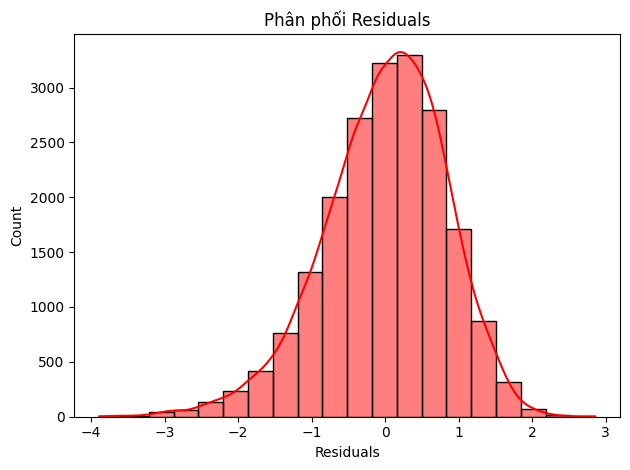

In [78]:
# 2. Histogram của residuals
sns.histplot(residuals, kde=True, bins=20, color='red')
plt.title("Phân phối Residuals")
plt.xlabel("Residuals")

plt.tight_layout()
plt.show()

Nhận xét:

- Biểu đồ residual có dạng chuông, gần giống với phân phối chuẩn.

- Sai số tập trung chủ yếu quanh 0, nghĩa là phần lớn dự đoán là khá chính xác.

- Không có dấu hiệu của sai số lệch hoặc độ bất thường → thỏa mãn một giả định quan trọng của hồi quy tuyến tính: phân phối chuẩn của sai số.

In [9]:
# Đánh giá mô hình
from sklearn.metrics import mean_squared_error,  mean_absolute_error, r2_score
mseLN = mean_squared_error(y_test, y_pred)
maeLN = mean_absolute_error(y_test, y_pred)
r2LN = r2_score(y_test, y_pred)

print("=== CÁC ĐÁNH GIÁ MÔ HÌNH LINEAR REGRESSION ===")
print(f"Mean Squared Error (MSE): {mseLN:.4f}")
print(f"Mean Absolute Error (MAE): {maeLN:.4f}")
print(f"R² Score: {r2LN:.4f}")

=== CÁC ĐÁNH GIÁ MÔ HÌNH LINEAR REGRESSION ===
Mean Squared Error (MSE): 0.7004
Mean Absolute Error (MAE): 0.6597
R² Score: 0.5680


📌 Kết luận
- Mean Squared Error (MSE): 0.7004
→ Trung bình bình phương sai số là ~0.7. Giá trị này không quá cao, cho thấy mô hình không quá kém, nhưng vẫn còn độ lệch giữa giá trị dự đoán và thực tế.

- Mean Absolute Error (MAE): 0.6597
→ Trung bình sai số tuyệt đối ~0.66 đơn vị. Với thang đo mood_score là từ 1 đến 10, sai số khoảng hơn nửa điểm là tạm chấp nhận.

- R² Score: 0.5680

→ Mô hình giải thích được khoảng 56.8% phương sai của biến mục tiêu. Đây là một mức khá ổn đối với một mô hình tuyến tính trong bài toán hành vi tâm lý, tuy nhiên còn tiềm năng cải thiện bằng các mô hình phi tuyến hoặc kỹ thuật chọn đặc trưng.

Bonus: Sử dụng Cross_val_score

In [87]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Mô hình
model = LinearRegression()

# Đánh giá R²
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"R² scores: {r2_scores}")
print(f"R² Mean: {np.mean(r2_scores):.4f}")

# Đánh giá MSE (dùng negative MSE vì cross_val_score mặc định dùng "maximize")
mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"MSE scores: {-mse_scores}")
print(f"MSE Mean: {-np.mean(mse_scores):.4f}")


R² scores: [0.56962177 0.57908308 0.57111866 0.57222811 0.5625768 ]
R² Mean: 0.5709
MSE scores: [0.70726601 0.68658155 0.70644819 0.70638084 0.69936417]
MSE Mean: 0.7012


# Mô hình GradientBoostingRegressor(Vũ Minh Đức)

Lý do chọn GradientBoostingRegressor

- Đây là mô hình hồi quy mạnh, phù hợp để dự đoán mood_score – một giá trị liên tục.

- Mô hình hóa tốt các mối quan hệ phức tạp và phi tuyến giữa các yếu tố (ví dụ: sleep_hours, stress_level, screen_time_hours…) với mood.

- Mô hình còn cung cấp feature importance, giúp giải thích rõ yếu tố nào ảnh hưởng mạnh nhất.

In [10]:
# Xác định cột mục tiêu
target = 'mood_score'

# Tách X (features) và y (nhãn mục tiêu)
X = df.drop(columns=[target]).copy()
y = df[target].copy()

# Kiểm tra kích thước
print("Kích thước X:", X.shape)  # (số dòng, số cột feature)
print("Kích thước y:", y.shape)  # (số dòng,)

Kích thước X: (100000, 5)
Kích thước y: (100000,)


In [11]:
# Kiểm tra số lượng giá trị thiếu theo từng cột
missing_values = X.isnull().sum()
print(missing_values)

screen_time_hours              0
social_media_platforms_used    0
hours_on_TikTok                0
sleep_hours                    0
stress_level                   0
dtype: int64


In [28]:
print(X.dtypes)

screen_time_hours              float64
social_media_platforms_used      int64
hours_on_TikTok                float64
sleep_hours                    float64
stress_level                     int64
dtype: object


In [ ]:
# Mã hóa biến phân loại:
# Kết quả kiểm tra X.dtypes cho thấy tất cả 5 cột đặc trưng đều là số (int64 hoặc float64).
# Không cần mã hóa biến phân loại.

In [ ]:
# Chia dữ liệu Train/Test và chuẩn hóa

In [ ]:
print("✅ Số mẫu train:", X_train.shape)
print("✅ Số mẫu test:", X_test.shape)

✅ Số mẫu train: (80000, 5)
✅ Số mẫu test: (20000, 5)


In [ ]:
# Chuẩn hóa dữ liệu (Scaling)

In [12]:
from sklearn.preprocessing import StandardScaler

# Khởi tạo bộ chuẩn hóa
scaler = StandardScaler()

# Fit scaler trên dữ liệu train và transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform dữ liệu test (dùng scaler đã fit)
X_test_scaled = scaler.transform(X_test)

# Kiểm tra kích thước
print("✅ X_train_scaled shape:", X_train_scaled.shape)
print("✅ X_test_scaled shape:", X_test_scaled.shape)

✅ X_train_scaled shape: (80000, 5)
✅ X_test_scaled shape: (20000, 5)


In [13]:
# BƯỚC 4: Huấn luyện mô hình GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Khởi tạo mô hình
gbr = GradientBoostingRegressor(
    n_estimators=200,    # số lượng cây
    learning_rate=0.1,  # tốc độ học
    max_depth=3,        # độ sâu của mỗi cây
    random_state=42
)

# Huấn luyện mô hình
gbr.fit(X_train_scaled, y_train)

print("Đã huấn luyện xong GradientBoostingRegressor!")

Đã huấn luyện xong GradientBoostingRegressor!


In [14]:
# BƯỚC 5: Đánh giá mô hình
# Dự đoán
y_pred = gbr.predict(X_test_scaled)

mseGBR = mean_squared_error(y_test, y_pred)
r2GBR = r2_score(y_test, y_pred)

print(f"📌 Mean Squared Error (MSE): {mseGBR:.2f}")
print(f"📌 R² Score: {r2GBR:.2f}")

📌 Mean Squared Error (MSE): 0.55
📌 R² Score: 0.66


In [ ]:
#  Phân tích kết quả để ghi vào báo cáo:
# MSE = 0.55
#  Sai số trung bình bình phương giữa giá trị thật và giá trị dự đoán khá thấp.
#  Mô hình dự đoán tốt, sai số nhỏ.

# R² = 0.66
#  Mô hình giải thích được 66% phương sai của dữ liệu.
#  Đây là một kết quả khá tốt cho mô hình Gradient Boosting ở lần huấn luyện đầu tiên.


# ✅ Đánh giá mô hình:
# MSE = 0.55 (thấp, dự đoán chính xác tương đối tốt)
# R² = 0.66 (mô hình giải thích 66% sự biến thiên của dữ liệu)
#  Mô hình GradientBoostingRegressor đã đạt kết quả khả quan trên tập dữ liệu này.

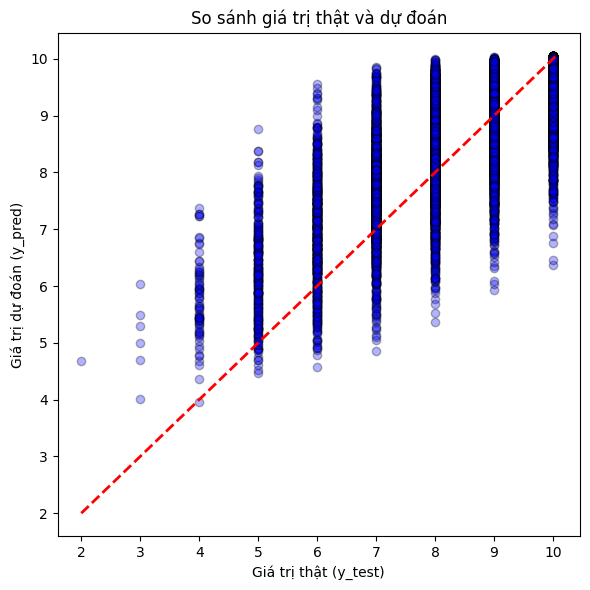

In [37]:
# Biểu đồ Scatter – So sánh giá trị thật và dự đoán
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue', edgecolors='k')
plt.xlabel("Giá trị thật (y_test)")
plt.ylabel("Giá trị dự đoán (y_pred)")
plt.title("So sánh giá trị thật và dự đoán")

# Vẽ đường chéo y = x (dự đoán hoàn hảo)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

plt.tight_layout()
plt.show()

In [ ]:
# ✅ Biểu đồ scatter giữa giá trị thật và dự đoán cho thấy:
# Xu hướng dự đoán của mô hình GradientBoostingRegressor phù hợp với xu hướng dữ liệu thật.
# Đa số điểm nằm gần đường y=x (đường đỏ), chứng tỏ mô hình dự đoán chính xác khá cao.
# Một số trường hợp giá trị thật thấp (mood_score 2–4) bị dự đoán hơi cao, thể hiện sai số nhỏ ở vùng thấp, nhưng không ảnh hưởng lớn đến tổng thể.
# Tổng quan, mô hình hoạt động tốt và có khả năng dự đoán đáng tin cậy.

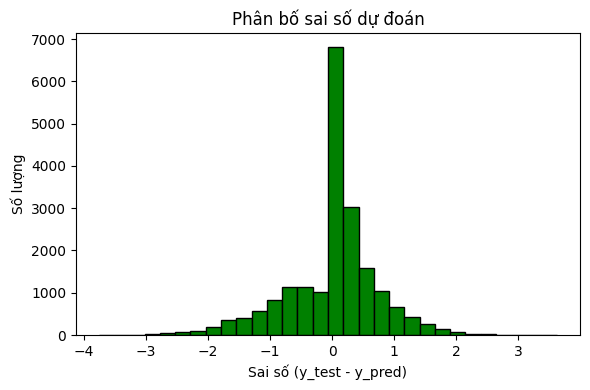

In [38]:
# Biểu đồ Histogram – Phân bố sai số
# Tính sai số
errors = y_test - y_pred

plt.figure(figsize=(6,4))
plt.hist(errors, bins=30, edgecolor='black', color='green')
plt.xlabel("Sai số (y_test - y_pred)")
plt.ylabel("Số lượng")
plt.title("Phân bố sai số dự đoán")
plt.tight_layout()
plt.show()

In [ ]:
# Phân bố sai số dự đoán:
# Sai số tập trung cao quanh 0, chứng tỏ mô hình GradientBoostingRegressor dự đoán chính xác cho phần lớn mẫu.
# Phân bố đối xứng, không bị lệch về một phía, cho thấy mô hình không thiên về dự đoán quá cao hay quá thấp.
# Sai số đa phần trong khoảng [-1, 1], chỉ có rất ít outlier nằm ngoài khoảng này.

In [39]:
 # BƯỚC 6: Phân tích độ quan trọng của đặc trưng
# Lấy danh sách độ quan trọng
importances = gbr.feature_importances_
feature_names = X.columns

# Tạo DataFrame để dễ xem
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

# Sắp xếp theo mức độ quan trọng giảm dần
feat_imp = feat_imp.sort_values("Importance", ascending=False)
print("📌 Độ quan trọng các đặc trưng:")
print(feat_imp)


📌 Độ quan trọng các đặc trưng:
                       Feature  Importance
3                  sleep_hours    0.576105
4                 stress_level    0.266679
0            screen_time_hours    0.093487
2              hours_on_TikTok    0.063487
1  social_media_platforms_used    0.000242


C:\Users\DELL\AppData\Local\Temp\ipykernel_17912\2962019322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp, x="Importance", y="Feature", palette="viridis")


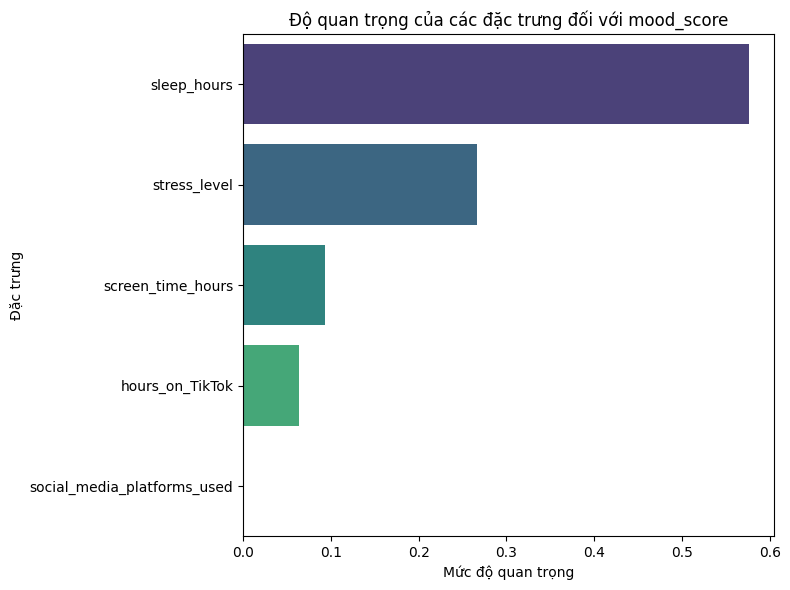

In [40]:
plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp, x="Importance", y="Feature", palette="viridis")
plt.title("Độ quan trọng của các đặc trưng đối với mood_score")
plt.xlabel("Mức độ quan trọng")
plt.ylabel("Đặc trưng")
plt.tight_layout()
plt.show()

In [ ]:
# Phân tích độ quan trọng của các đặc trưng:
# sleep_hours là đặc trưng quan trọng nhất, chiếm 57.6% độ ảnh hưởng. Điều này cho thấy giấc ngủ có vai trò quyết định đến mood_score.
# stress_level xếp thứ hai, chiếm 26.7%, phản ánh rõ mối liên hệ giữa căng thẳng và trạng thái cảm xúc.
# screen_time_hours và hours_on_TikTok ảnh hưởng ở mức vừa phải.
# social_media_platforms_used gần như không ảnh hưởng đến mood_score (0.02%).
#  Kết luận: Việc ngủ đủ giấc và giảm stress là hai yếu tố then chốt để cải thiện mood. Mô hình đã hỗ trợ xác định các yếu tố có tác động rõ ràng nhất đến trạng thái tinh thần người dùng.

In [ ]:
 # BƯỚC 7: Dự đoán với dữ liệu mới và phân loại trạng thái mood

In [41]:
# Ví dụ: một người dùng mới với đặc trưng cụ thể
new_data = pd.DataFrame({
    'screen_time_hours': [6],
    'social_media_platforms_used': [3],
    'hours_on_TikTok': [2],
    'sleep_hours': [7],
    'stress_level': [4]
})

print(new_data)


   screen_time_hours  social_media_platforms_used  hours_on_TikTok  \
0                  6                            3                2   

   sleep_hours  stress_level  
0            7             4  


In [44]:
new_data_scaled = scaler.transform(new_data)
predicted_mood = gbr.predict(new_data_scaled)[0]
print(f"🔮 Dự đoán mood_score: {predicted_mood:.2f}")

if predicted_mood >= 7:
    mood_state = "😃 Tâm trạng tốt"
elif predicted_mood >= 4:
    mood_state = "😐 Tâm trạng bình thường"
else:
    mood_state = "😞 Tâm trạng kém"

print(f"📌 Trạng thái hiện tại: {mood_state}")

🔮 Dự đoán mood_score: 9.55
📌 Trạng thái hiện tại: 😃 Tâm trạng tốt


In [45]:
# Ví dụ thêm nhiều người
new_data = pd.DataFrame({
    'screen_time_hours': [6, 3],
    'social_media_platforms_used': [3, 2],
    'hours_on_TikTok': [2, 1],
    'sleep_hours': [7, 5],
    'stress_level': [4, 8]
})

new_data_scaled = scaler.transform(new_data)
new_data['predicted_mood'] = gbr.predict(new_data_scaled)

# Hàm xác định trạng thái
def get_state(score):
    if score >= 7:
        return "😃 Tốt"
    elif score >= 4:
        return "😐 Bình thường"
    else:
        return "😞 Kém"

new_data['mood_state'] = new_data['predicted_mood'].apply(get_state)
print(new_data)


   screen_time_hours  social_media_platforms_used  hours_on_TikTok  \
0                  6                            3                2   
1                  3                            2                1   

   sleep_hours  stress_level  predicted_mood mood_state  
0            7             4        9.552360      😃 Tốt  
1            5             8        8.831507      😃 Tốt  


In [46]:
import pickle

# Lưu mô hình GradientBoostingRegressor
with open('mood_model.pkl', 'wb') as f:
    pickle.dump(gbr, f)

# Lưu scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("✅ Đã lưu mô hình vào mood_model.pkl và scaler vào scaler.pkl")


✅ Đã lưu mô hình vào mood_model.pkl và scaler vào scaler.pkl


# Mô hình Neural Network(Nguyễn Hoàng Nguyên)

Lý do chọn Neural Network: Tập dữ liệu lớn (100.000 dữ liệu), dữ liệu phi tuyến (dựa vào các biểu đồ scatter), với thử nhiều mô hình khác nhau nữa

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
model = MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu',
                     solver='adam', max_iter=2000, early_stopping=True, random_state=42)
model.fit(X_train_scaled, y_train)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(128, 64, 32),
             max_iter=2000, random_state=42)

In [17]:
# Đánh giá mô hình
y_pred = model.predict(X_test_scaled)
mseNN = mean_squared_error(y_test, y_pred)
r2NN =  r2_score(y_test, y_pred)
print("MSE:", mseNN)
print("R2 Score:", r2NN)

MSE: 0.54886170993239
R2 Score: 0.6614599801690528


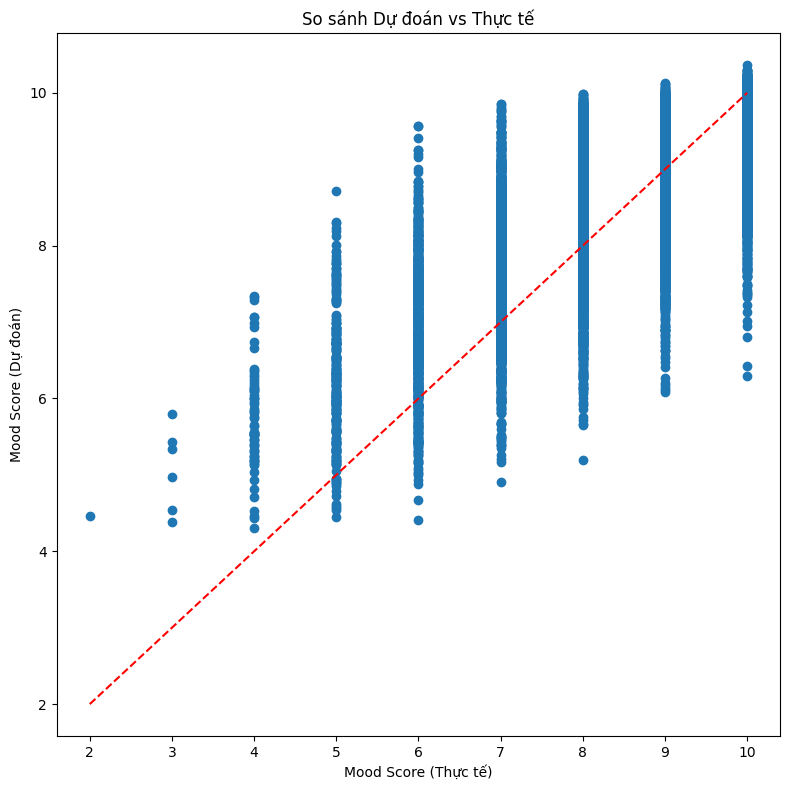

In [54]:
# Trực quan hóa kết quả
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel("Mood Score (Thực tế)")
plt.ylabel("Mood Score (Dự đoán)")
plt.title("So sánh Dự đoán vs Thực tế")
plt.tight_layout()
plt.show()

In [36]:
# Dự đoán thử với giá trị mới
new_data = pd.DataFrame({
    'screen_time_hours': [6],
    'social_media_platforms_used': [3],
    'hours_on_TikTok': [2],
    'sleep_hours': [7],
    'stress_level': [4]
})
predicted_mood = model.predict(new_data)
print("Dự đoán mood_score:", predicted_mood[0])

Dự đoán mood_score: 8.313776320427653


📌 Kết luận
Mô hình Neural Network cho kết quả R2 không cao (66.05%)  

Chưa thể triển khai mô hình vào thực tế vì độ chính xác chưa cao 
 
Mô hình vẫn có xu hướng tuyến tính, cho thấy mô hình có nắm được xu hướng chung

# Mô hình Polynomial Regression(Nguyễn Trọng Vỹ)

Lí do chọn Mô hình Polynomial Regression

- cân bằng giữa độ phức tạp cần thiết để học quan hệ phi tuyến trong dữ liệu, và sự đơn giản, dễ triển khai, dễ giải thích.

- Với tập dữ liệu có 100.000 dòng và 5 biến đầu vào, mô hình này đủ khả năng học được các mối tương tác phi tuyến.

In [ ]:
for n in range(2,10):
    poly = PolynomialFeatures(degree=n, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Huấn luyện mô hình Polynomial Regression
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Đánh giá mô hình
    print("Đa Thức Bậc:", n)
    y_pred = model.predict(X_test_poly)
    mse =  mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print("\tMSE:", mse)
    print("\tRMSE:", rmse)
    print("\tR2 Score:", r2)

Đa Thức Bậc: 2
	MSE: 0.5531550826358134
	RMSE: 0.7437439630920128
	R2 Score: 0.6588118113245954
Đa Thức Bậc: 3
	MSE: 0.5494519934144072
	RMSE: 0.741250290667334
	R2 Score: 0.6610958910404222
Đa Thức Bậc: 4
	MSE: 0.5439802839179644
	RMSE: 0.7375501907788814
	R2 Score: 0.6644708625640563
Đa Thức Bậc: 5
	MSE: 0.5445510524284908
	RMSE: 0.7379370247036604
	R2 Score: 0.6641188103451171
Đa Thức Bậc: 6
	MSE: 0.5459520814031176
	RMSE: 0.7388857025299093
	R2 Score: 0.6632546502693262
Đa Thức Bậc: 7
	MSE: 0.5486271973065509
	RMSE: 0.7406937270603491
	R2 Score: 0.6616046284612647
Đa Thức Bậc: 8
	MSE: 0.5536539676649415
	RMSE: 0.7440792751212343
	R2 Score: 0.6585040971142614
Đa Thức Bậc: 9
	MSE: 0.5595628420602787
	RMSE: 0.7480393318939044
	R2 Score: 0.6548594805946968


Lựa chọn đa thức bậc 4 vì nhận thấy có kết quả tốt nhất

In [20]:
poly = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Huấn luyện mô hình Polynomial Regression
model = LinearRegression()
model.fit(X_train_poly, y_train)
    
# Đánh giá mô hình
print("Đa Thức Bậc:", 4)
y_pred = model.predict(X_test_poly)
msePLR =  mean_squared_error(y_test, y_pred)
rmsePLR = np.sqrt(msePLR)
r2PLR = r2_score(y_test, y_pred)
print("\tMSE:", msePLR)
print("\tRMSE:", rmsePLR)
print("\tR2 Score:", r2PLR)

Đa Thức Bậc: 4
	MSE: 0.5439802839179644
	RMSE: 0.7375501907788814
	R2 Score: 0.6644708625640563


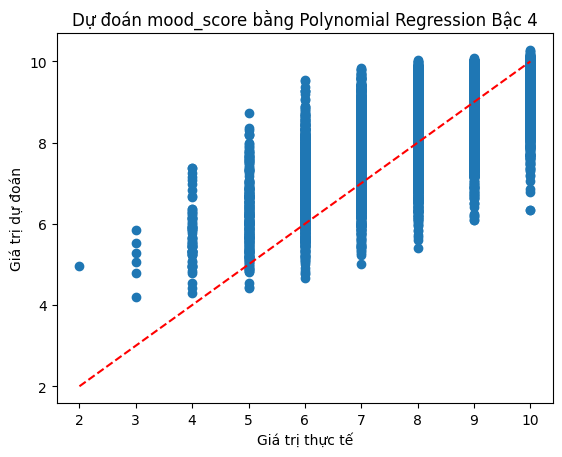

In [62]:
plt.scatter(y_test, y_pred)
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.title("Dự đoán mood_score bằng Polynomial Regression Bậc 4")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

# Mô hình RandomForestRegressor (Nguyễn Ngọc Hải)

Lựa chọn model với dữ liệu đầu vào

In [21]:
df1 = pd.read_csv('digital_habits_vs_mental_health.csv').head(1000)
X1 = df1.drop(columns=['mood_score'])
y1 = df1['mood_score']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
reg = LazyRegressor(verbose=0, ignore_warnings=True)
models, predictions = reg.fit(X1_train, X1_test, y1_train, y1_test)
print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 218
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 5
[LightGBM] [Info] Start training from score 9.037500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [22]:
print(models)
pa = pd.DataFrame(models).sort_values(by="R-Squared", ascending=False)
print(pa)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
SVR                                          0.65       0.66  0.76        0.07
NuSVR                                        0.65       0.66  0.76        0.53
GradientBoostingRegressor                    0.57       0.58  0.84        0.18
RandomForestRegressor                        0.55       0.56  0.86        0.37
OrthogonalMatchingPursuitCV                  0.54       0.55  0.87        0.39
SGDRegressor                                 0.54       0.55  0.87        0.31
LassoLarsCV                                  0.54       0.55  0.87        0.03
LassoLarsIC                                  0.54       0.55  0.87        0.02
LassoCV                                      0.54       0.55  0.87        0.10
ElasticNetCV                                 0.54       0.55  0.87        0.11
BayesianRidge                                0.54   

Dựa vào bảng trên có các model phù hợp với dữ liệu bài toán ta chọn RandomForestRegressor vì:
- SVR,NuSVR có R-Squared,RMSE đều tốt hơn RandomForestRegressor nhưng tốc độ huấn luyện lâu và trước khi huấn luyện cũng cần tinh chỉnh dữ liệu khác nhiều.

- GradientBoostingRegressor thì cần xử lí dữ liệu khá chi tiết mới được đựa vào model để huấn luyện có thể dẫn đến overfiting mà R-Squared,RMSE cũng chỉ hơn có 0.02 không đáng kể

=> chọn RandomForestRegressor :
- Nó không yêu cầu chuẩn hóa hay scale dữ liệu.

- Có thể xử lý tốt cả biến liên tục (float) lẫn rời rạc (int).

- Có khả năng tự động nắm bắt quan hệ phi tuyến và tương tác giữa các biến.

Chọn tham số và huấn luyện model

In [11]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X, y)
print("Best Parameters:")
print(grid_search.best_params_)
print(f"Best RMSE: {-grid_search.best_score_:.4f}")


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters:
{'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE: 0.8109


Sau khi dùng GridSearchCV để có thể biết được huấn luyện với bài toán trên dùng tham số nào hợp lí cho model RandomForestRegressor thì ta thu được

- RMSE = 0.8109-Nghĩa là sai số trung bình của dự đoán lệch khoảng ~0.81 điểm mood_score trên thang điểm 10. Đây là kết quả khá tốt nếu như dữ liệu bạn có độ nhiễu cao.

- max_depth=20-Mô hình khá sâu, cho phép học được nhiều quan hệ phi tuyến, nhưng vẫn được kiểm soát để tránh overfitting.

- min_samples_split=5, min_samples_leaf=3-Giúp cây không quá rẽ nhánh nhỏ → tránh overfit → tăng khả năng tổng quát hóa.

- n_estimators=100-100 cây là mức hợp lý, cho độ chính xác tốt và thời gian huấn luyện chấp nhận được.

In [23]:
model = RandomForestRegressor(
    max_depth=20,
    min_samples_leaf=3,
    min_samples_split=5,
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Đánh giá model

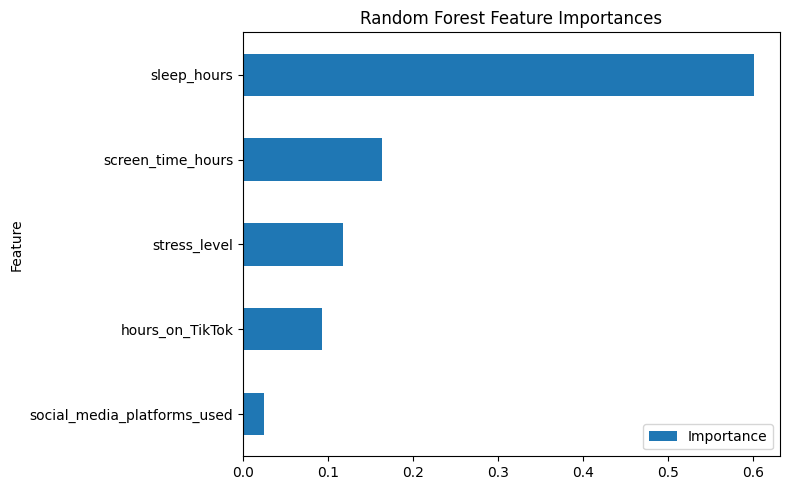

In [14]:
importances = model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp_df.sort_values('Importance', ascending=True).plot(kind='barh', x='Feature', y='Importance', figsize=(8, 5))
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

Sau khi huấn luyện model xong ta có thể thấy

- Thời gian ngủ có ảnh hưởng lớn nhất đến mood. Có thể do giấc ngủ ảnh hưởng trực tiếp đến tinh thần và năng lượng.

- Thời gian dùng màn hình có thể liên quan đến căng thẳng hoặc gián tiếp ảnh hưởng tới giấc ngủ.

- Mức độ căng thẳng ảnh hưởng trực tiếp đến tâm trạng.

- Thời gian dùng TikTok Có thể chỉ ảnh hưởng gián tiếp đến mood thông qua giấc ngủ hoặc stress.

- Số lượng nền tảng mạng xã hội dùng không ảnh hưởng nhiều đến mood nếu không gắn với thời lượng sử dụng.

In [27]:
mseRFR = mean_squared_error(y_test, y_pred)
r2RFR = r2_score(y_test, y_pred)
print(f"MSE: {mseRFR:.2f}")
print(f"R2 Score: {r2RFR:.2f}")

MSE: 0.59
R2 Score: 0.64


Trực quan dự đoán

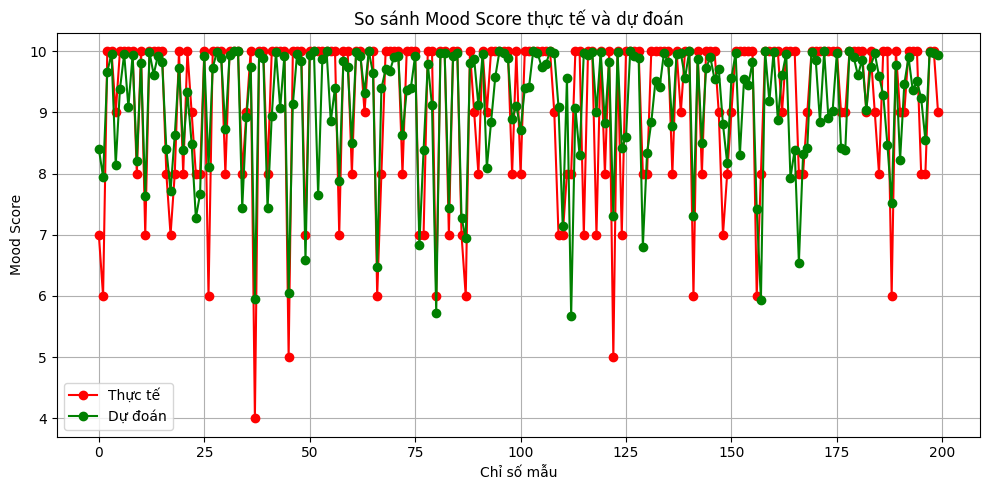

In [16]:
indices = np.arange(len(y_test))

plt.figure(figsize=(10,5))
plt.plot(indices, y_test, 'ro-', label="Thực tế")    # đỏ - thực tế
plt.plot(indices, y_pred, 'go-', label="Dự đoán")    # xanh - dự đoán

plt.xlabel("Chỉ số mẫu")
plt.ylabel("Mood Score")
plt.title("So sánh Mood Score thực tế và dự đoán")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Sau khi xây kiểm nhiệm với 200 mẫu trong tệp dữ liệu :
- Cả hai đường (thực tế và dự đoán) đều tập trung quanh mức mood từ 7 đến 10, cho thấy mô hình đã học được phần lớn xu hướng.

- Tuy nhiên, vẫn có nhiều điểm bị lệch xa → thể hiện những dự đoán chưa tốt ở một số mẫu, đặc biệt là các điểm có giá trị thực tế thấp (4–6), mô hình thường dự đoán cao hơn.

- Đường dự đoán thường ít rơi xuống các giá trị thấp hơn 6 → điều này cho thấy mô hình có thể thiên lệch về dự đoán các mood_score cao.

In [25]:
y_pred = model.predict(X_test)

# Compare predictions with actual values
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

Actual: 8.00, Predicted: 7.32
Actual: 10.00, Predicted: 9.31
Actual: 10.00, Predicted: 9.83
Actual: 7.00, Predicted: 8.02
Actual: 10.00, Predicted: 9.62
Actual: 6.00, Predicted: 9.64
Actual: 10.00, Predicted: 9.64
Actual: 10.00, Predicted: 9.81
Actual: 10.00, Predicted: 9.93
Actual: 10.00, Predicted: 9.43


📌 Kết luận
- Xuất hiện ouliers có thể bỏ 1 feature trong quá trình huấn luyện

- Stress level và sleep_hours là những yếu tố ảnh hưởng lớn nhất đến mood.

- Lựa chọn model RandomForestRegressor nhưng vì RandomForestRegressor nếu tinh chỉnh feature cùng không thay đổi nhiều lên khó cải thiện

- Sai số trung bình gốc giữa giá trị thực và dự đoán là 0.83

- Mô hình giải thích được khoảng 0.59 phương sai của biến mục tiêu 

- Sai số bình phương trung bình 0.69, đơn vị tính là bình phương của đơn vị gốc

=>	Mô hình tạm ổn, cần cải thiện

# ĐÁNH GIÁ CHUNG GIỮA CÁC MÔ HÌNH


In [26]:
mo_hinh = ['Linear_Regression', 'GradientBoostingRegressor', 'RandomForestRegressor', 'neural_network', 'Polynomial_Regression']
r_2 = [r2LN, r2GBR, r2RFR, r2NN, r2PLR,]
print("=== R² Scores cho từng mô hình ===")
for ten, diem in zip(mo_hinh, r_2):
    print(f"{ten}: {diem:.4f}")

m_s_e = [mseLN, mseGBR, mseRFR, mseNN, msePLR]
print("\n=== MSE cho từng mô hình ===")
for ten, diem in zip(mo_hinh, m_s_e):
    print(f"{ten}: {diem:.4f}")

=== R² Scores cho từng mô hình ===
Linear_Regression: 0.5680
GradientBoostingRegressor: 0.6626
RandomForestRegressor: 0.6383
neural_network: 0.6615
Polynomial_Regression: 0.6645

=== MSE cho từng mô hình ===
Linear_Regression: 0.7004
GradientBoostingRegressor: 0.5469
RandomForestRegressor: 0.5864
neural_network: 0.5489
Polynomial_Regression: 0.5440


📈 R² Scores (độ chính xác):

- Polynomial Regression: 0.6645 — cao nhất, cho thấy mô hình này mô phỏng tốt quan hệ phi tuyến giữa dữ liệu đầu vào và đầu ra.

- GradientBoostingRegressor: 0.6626 — cũng rất tốt, chỉ kém một chút.

- Neural Network: 0.6615 — khá ổn, nhưng không vượt trội.

- RandomForestRegressor: 0.6383 — thấp hơn một chút.

- Linear Regression: 0.5680 — thấp nhất, do không phù hợp với quan hệ phi tuyến.

📉 MSE (Mean Squared Error – độ sai số):

- Polynomial Regression: 0.5440 — nhỏ nhất, chứng tỏ dự đoán sát thực tế hơn cả.

- Neural Network: 0.5489

- GradientBoosting: 0.5469

- Random Forest: 0.5864

- Linear Regression: 0.7004 — sai số cao nhất.

=> Mô hình được đề xuất sử dụng: Polynomial Regression

- Có R² cao nhất và MSE thấp nhất trong tất cả các mô hình đã thử.

- Hiệu quả vượt trội hơn Linear Regression nhờ khả năng mô hình hóa quan hệ phi tuyến.

- Dễ cài đặt, dễ huấn luyện.

- Kiểm soát được mức độ phức tạp qua tham số degree.




Hướng phát triển :

- Tối ưu bậc đa thức (degree): thử các giá trị từ 2 → 5 để tìm điểm cân bằng giữa độ chính xác và tránh quá khớp (overfitting).

- Chuẩn hóa dữ liệu đầu vào (nếu chưa làm): dùng StandardScaler giúp Polynomial Features ổn định hơn.

- Cross-validation: Áp dụng k-fold cross-validation để kiểm tra độ ổn định và khả năng tổng quát của mô hình.

- Loại bỏ outlier khi huấn luyện

- Tiếp tục tìm hiểu các model khác để cải thiện bài toán